<a href="https://colab.research.google.com/github/mdsalimulhaqroni1/Deep-Learning/blob/main/Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN Image Classification with Keras and CIFAR-10

Step 1: Choose a Dataset
The first step is to choose a dataset for the image classification task. There are many publicly available datasets, such as CIFAR-10, CIFAR-100, and MNIST, that can be used for training and testing the CNN. For this tutorial, we will be using the CIFAR-10 dataset, which consists of 60,000 32×32 color images across ten classes, with 6,000 images in each class.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
# Download the data set
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

Step 2: Prepare the Dataset for Training
Next, we will load the CIFAR-10 dataset and prepare it for training. This involves splitting the dataset into training and test sets, and then normalizing the pixel values of the images to the range of 0 to 1.

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

Step 3: Create Training Data and Assign Labels
We will use the training set of images and labels to train the CNN. We will use the flow_from_directory() method from the keras.preprocessing.image module to create a generator that will read the images from the directory and apply data augmentation.

We will assign labels to the data by converting the categorical class labels to one-hot encoded vectors.

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

Step 4: Define and Train the CNN Model
We will define the CNN architecture using the Keras library. The model will consist of several convolutional layers followed by max pooling layers, and a fully connected layer with a softmax activation function. We will then train the model using the fit() method.

In [ ]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 19s 5ms/step - loss: 1.5028 - accuracy: 0.4520 - val_loss: 1.2047 - val_accuracy: 0.5647
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1576 - accuracy: 0.5890 - val_loss: 1.0537 - val_accuracy: 0.6297
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0012 - accuracy: 0.6453 - val_loss: 1.0048 - val_accuracy: 0.6487
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8963 - accuracy: 0.6852 - val_loss: 0.9516 - val_accuracy: 0.6675
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8252 - accuracy: 0.7087 - val_loss: 0.9193 - val_accuracy: 0.6775
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7614 - accuracy: 0.7325 - val_loss: 0.8837 - val_accuracy: 0.6938
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7124 - accuracy: 0.7481 - val_loss: 0.8616 - val_accuracy

Step 5: Test the Model’s Accuracy
Finally, we will evaluate the trained model on the test set using the evaluate() method and calculate the accuracy of the model.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

[8]


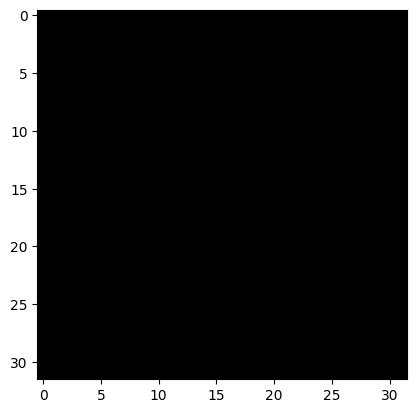

In [ ]:
print(test_labels[2])
plt.imshow(test_images[2].astype(int))

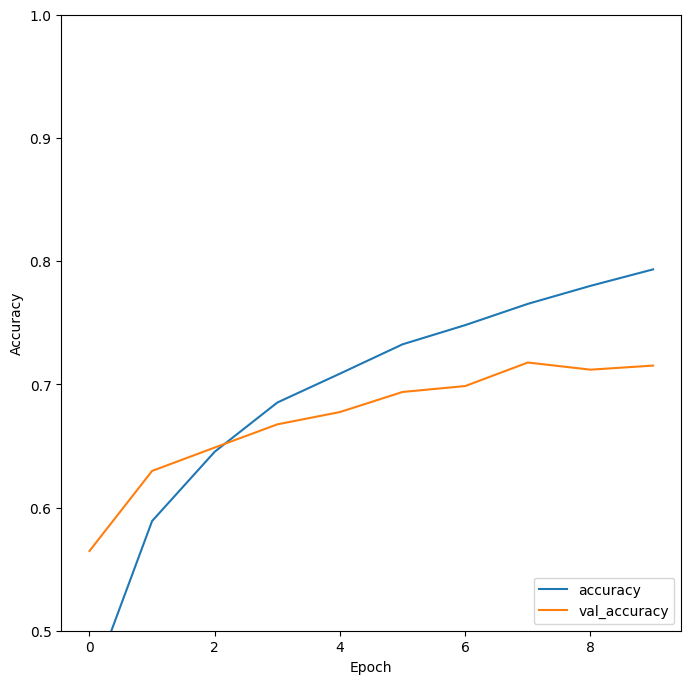

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.savefig("output_report.png")